# Genrify Project - Phase II
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

In [1]:
from genrify_module import *
%matplotlib inline

### Data Loading Using Pandas

In [2]:
data = pd.read_csv("music_collection.csv")
data = data.iloc[np.random.permutation(len(data))]
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

### Data Shape

In [3]:
print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 13
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	mode
	speechiness
	tempo
	time_signature
	valence


### Performance Measure

### Scaling

In [4]:
sc_attributes = scale(attributes)

### Multinomial Target Variable

In [5]:
GENRES = ['alternative','blues','classical','country','electro','folk','french','hard-rock','heavy-metal','hip-hop','indie','jazz','pop','psych-rock','punk-rock','r-n-b','reggae','rock','soul','techno']
target_multinomial = []
for i in data['genre']:
    target_multinomial.append(GENRES.index(i))
target_multinomial=np.array(target_multinomial)

## Baselines

### Random prediction

In [6]:
random_model = DummyClassifier(strategy='uniform')

random_acc_scores = cross_val_score(random_model, sc_attributes, target_multinomial,cv=10)
avg_random_acc = np.mean(random_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_random_acc))

Averaged Decision Tree Accuracy: 0.049


### Predicting the majority class

In [7]:
majo_model = DummyClassifier(strategy='most_frequent')

majo_acc_scores = cross_val_score(majo_model, sc_attributes, target_multinomial,cv=10)
avg_majo_acc = np.mean(majo_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_majo_acc))

Averaged Decision Tree Accuracy: 0.05


# Target variable

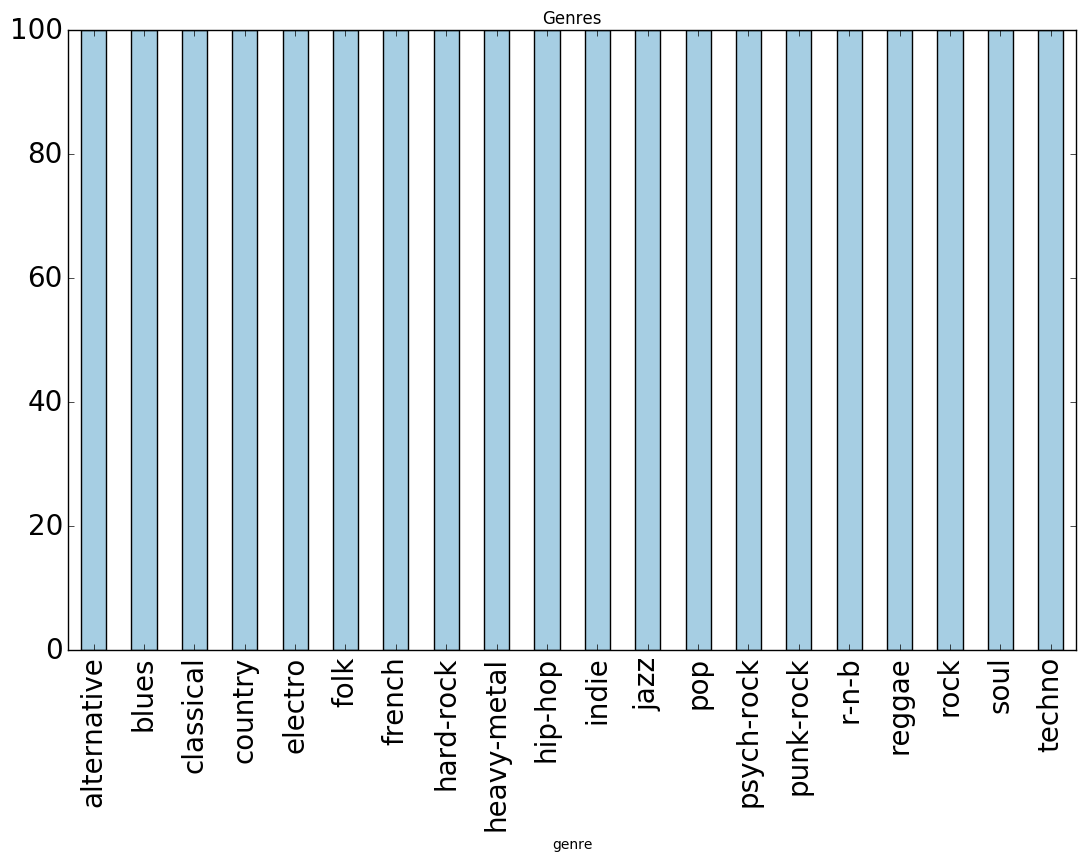

In [8]:
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)

# Target Variable vectorized

In [9]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))



Dimension: (2000, 20)
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])


# Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(sc_attributes, target_multinomial, train_size=0.67, random_state=1)

# Logistic Regression

[0.32900000000000001, 0.35849999999999999, 0.36350000000000005, 0.36350000000000005, 0.36400000000000005, 0.36350000000000005]
['loudness', 'acousticness', 'instrumentalness', 'mode', 'danceability', 'acousticness', 'acousticness', 'energy', 'energy', 'danceability', 'instrumentalness', 'acousticness', 'loudness', 'instrumentalness', 'energy', 'loudness', 'speechiness', 'loudness', 'valence', 'danceability']


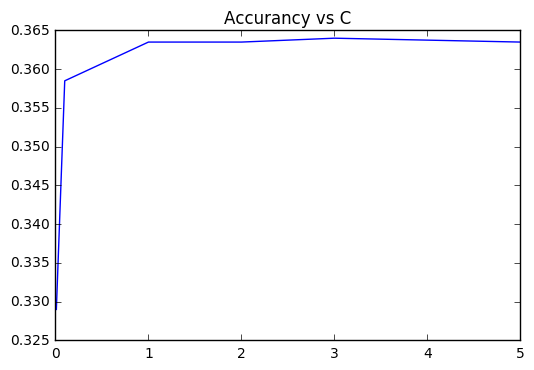

In [12]:
lr_models =[]
Cs = [0.01,0.1,1,2,3,5]
for c in Cs:
    lr_models.append(LogisticRegression(C=c, multi_class='multinomial', solver='newton-cg'))

acc_scores_c=[]
for model in lr_models:
    acc_scores = cross_val_score(model, sc_attributes, target_multinomial,cv=5)
    acc_scores_c.append(np.mean(acc_scores))

plt.plot(Cs,acc_scores_c)
plt.title('Accurancy vs C')
print(acc_scores_c)

lr_fitted = lr_models[4].fit(x_train,y_train) #model for C=3
#print(lr_fitted.coef_)   #array(nb_classes=20, nb_features=13)
indices_max_coef = np.argmax(lr_fitted.coef_, axis=1)
#print(indices_max_coef)
best_attribute_class = []     #Attribute that contributes the most to a given class based on the weight value 
for i in indices_max_coef:
    best_attribute_class.append(pd_attributes.columns.values[i])
print(best_attribute_class)

# Decision Tree

In [13]:
tree_model = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=15)

tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
avg_tree_acc = np.mean(tree_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_tree_acc))

Averaged Decision Tree Accuracy: 0.2875


# Naïve Bayes

In [14]:
NB_model = GaussianNB()
NB_acc_scores = cross_val_score(NB_model, sc_attributes, target_multinomial,cv=10)

avg_NB_acc = np.mean(NB_acc_scores)
print("Averaged Naïve Bayes Accuracy: " + str(avg_NB_acc))

Averaged Naïve Bayes Accuracy: 0.3035


# Neural Networks

In [15]:

NN_model = MLPClassifier(hidden_layer_sizes=(25,),alpha=10,activation='tanh', solver='lbfgs')
NN_acc_scores = cross_val_score(NN_model, sc_attributes, target_multinomial,cv=10)

avg_NN_acc = np.mean(NN_acc_scores)
print("Averaged Neural Networks Accuracy: " + str(avg_NN_acc))

Averaged Neural Networks Accuracy: 0.3625


# Support Vector Machine

In [17]:
Cs = [0.01,0.1,1,2,3,5]
max_score = 0
best_c = Cs[0]
for c in Cs:
    model = SVC(C=c)
    score = cross_val_score(model, sc_attributes, target_multinomial,cv=10, scoring='accuracy')
    print("Averaged accuracy for c=" + str(c) + ": " + str(np.mean(score)) )
    if (score > max_score):
        max_score = score
        best_c = c
        
print("Best accuracy is "+ str(max_score) + " with c=" + str(best_c))

Averaged accuracy for c=0.01: 0.3065
Averaged accuracy for c=0.1: 0.311
Averaged accuracy for c=1: 0.345
Averaged accuracy for c=2: 0.3385
Averaged accuracy for c=3: 0.335
Averaged accuracy for c=5: 0.332


# Random Forest

In [18]:
RF_model = RandomForestClassifier(min_samples_split=5, min_samples_leaf=10)
RF_acc_scores = cross_val_score(RF_model, sc_attributes, target_multinomial,cv=10)

avg_RF_acc = np.mean(NN_acc_scores)
print("Averaged Random Forest Accuracy: " + str(avg_RF_acc))

Averaged Random Forest Accuracy: 0.3625


## Factorized

### Models Loading

In [19]:
models = {}
for c in [0.01,0.1,1,2,3,5]:
    m = LogisticRegression(C=c, multi_class='multinomial', solver='newton-cg')
    models["Logistic Regression with c = {}".format(c)] = m
models["Decision Tree"]  = tree.DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=15)
models["Gaussian NB"]    = GaussianNB()
models["Neural Network"] = MLPClassifier(hidden_layer_sizes=(200,),alpha=10,activation='tanh', solver='lbfgs')
models["Random Forest"]  = RandomForestClassifier(min_samples_split=5, min_samples_leaf=10)

### Scoring

In [20]:
print("Averaged accuracy:\n")
for m_name, m in models.items():
    acc = np.mean(cross_val_score(m, sc_attributes, target_multinomial, cv=10))
    print("{}: {:1.3f}".format(m_name, acc))

Averaged accuracy:

Logistic Regression with c = 5: 0.366
Logistic Regression with c = 3: 0.365
Logistic Regression with c = 1: 0.363
Decision Tree: 0.287
Logistic Regression with c = 2: 0.365
Logistic Regression with c = 0.1: 0.360
Logistic Regression with c = 0.01: 0.336
Gaussian NB: 0.303
Random Forest: 0.336
Neural Network: 0.360
